In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('rgb.png')

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
blurred = cv2.medianBlur(gray, 5)

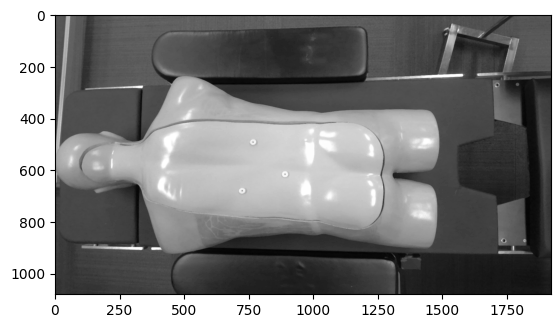

In [5]:
plt.imshow(blurred, cmap = "gray")
plt.show()

In [6]:
minDist = 20  # Minimum distance between the centers of detected circles
param1 = 100   # Upper threshold for the internal Canny edge detector
param2 = 20   # Threshold for center detection
minRadius = 8  # Minimum radius of the circles to detect
maxRadius = 15  # Maximum radius of the circles to detect

In [7]:
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

In [8]:
print(circles)

[[[888.5 617.5  12.2]
  [765.5 492.5  11. ]
  [721.5 679.5  12.7]]]


In [9]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        center = (i[0], i[1])
        radius = i[2]
        print(f"2D Center coordinates: {center}")
        
        # Draw the outer circle
        cv2.circle(img, center, radius, (0, 255, 0), 2)
        
        # Draw the center of the circle
        cv2.circle(img, center, 2, (0, 0, 255), 3)

2D Center coordinates: (888, 618)
2D Center coordinates: (766, 492)
2D Center coordinates: (722, 680)


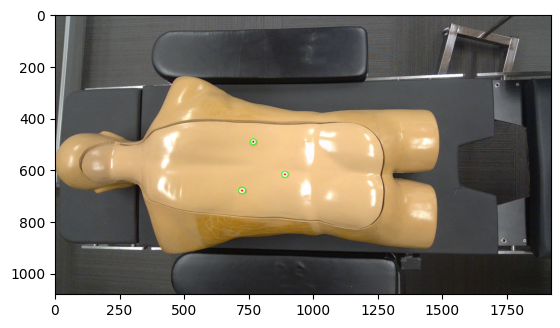

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Display the image with the detected circles
cv2.imshow("Detected Circles", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-04-19 18:16:52.213 Python[67931:12940969] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


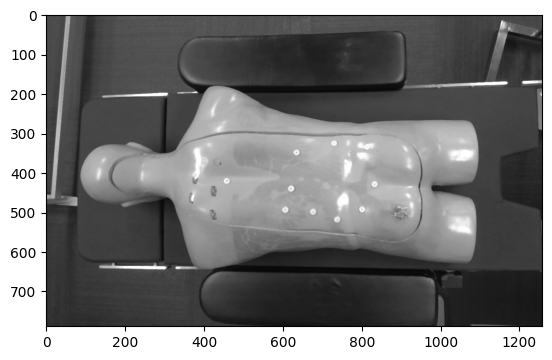

In [11]:
img = cv2.imread('Region of Interest.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray, 5)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap = "gray")
plt.show()

In [12]:
minDist = 30  # Minimum distance between the centers of detected circles
param1 = 10   # Upper threshold for the internal Canny edge detector
param2 = 20   # Threshold for center detection
minRadius = 7  # Minimum radius of the circles to detect
maxRadius = 11  # Maximum radius of the circles to detect

In [13]:
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

In [14]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        center = (i[0], i[1])
        radius = i[2]
        print(f"2D Center coordinates: {center}")
        
        # Draw the outer circle
        cv2.circle(img, center, radius, (0, 255, 0), 2)
        
        # Draw the center of the circle
        cv2.circle(img, center, 2, (0, 0, 255), 3)

2D Center coordinates: (730, 326)
2D Center coordinates: (802, 494)
2D Center coordinates: (606, 494)
2D Center coordinates: (676, 500)
2D Center coordinates: (458, 422)
2D Center coordinates: (634, 350)
2D Center coordinates: (738, 518)
2D Center coordinates: (834, 430)
2D Center coordinates: (622, 440)


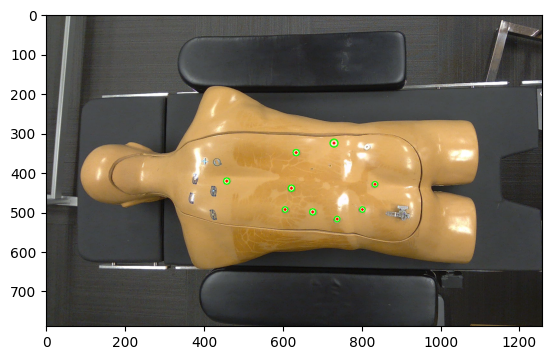

In [15]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Display the image with the detected circles
cv2.imshow("Detected Circles", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-04-19 18:00:48.026 Python[67600:12919582] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [112]:
https://arc.net/l/quote/ydlyjofc
https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

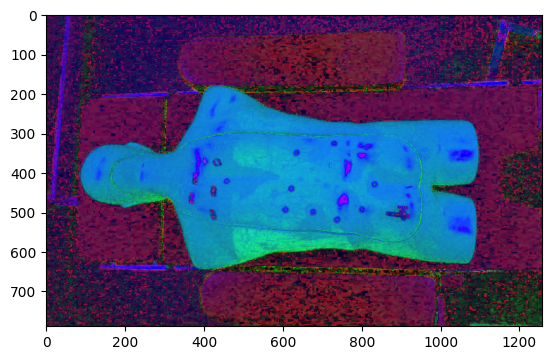

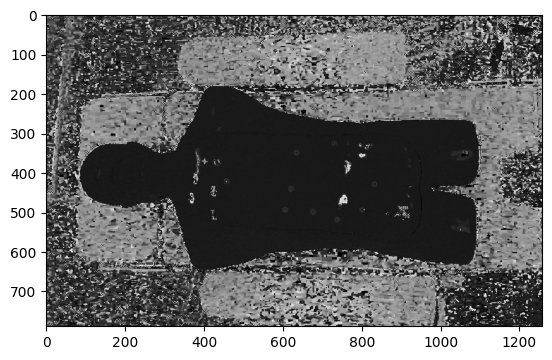

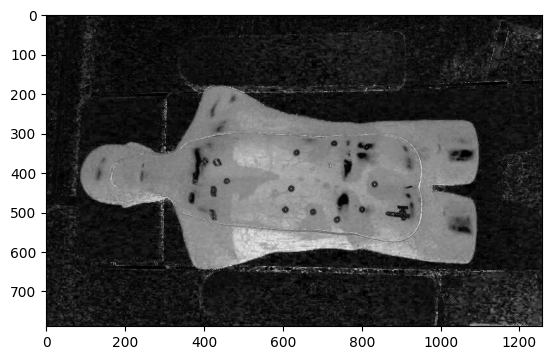

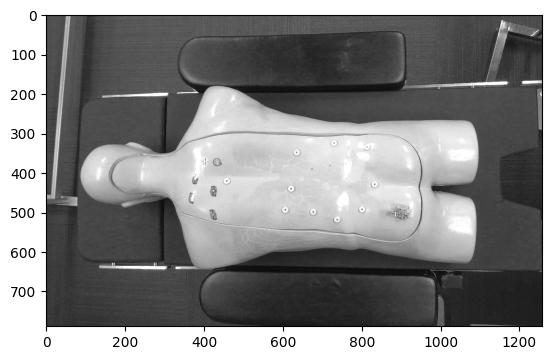

Center coordinates: (458, 420), Radius: 11
Center coordinates: (678, 500), Radius: 7
Center coordinates: (634, 350), Radius: 7
Center coordinates: (834, 432), Radius: 9
Center coordinates: (814, 334), Radius: 8
Center coordinates: (730, 326), Radius: 7
Center coordinates: (800, 494), Radius: 7
Center coordinates: (740, 520), Radius: 9
Center coordinates: (622, 442), Radius: 7
Center coordinates: (606, 494), Radius: 7


In [16]:
import cv2
import numpy as np
img = cv2.imread('Region of Interest.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

# Split the HSV channels
h, s, v = cv2.split(hsv)
plt.imshow(h, cmap = "gray")
plt.show()
plt.imshow(s, cmap = "gray")
plt.show()
plt.imshow(v, cmap = "gray")
plt.show()

# Apply CLAHE to each channel separately
clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))
h_clahe = clahe.apply(h)
s_clahe = clahe.apply(s)
v_clahe = clahe.apply(v)

# Merge the CLAHE-enhanced channels back
hsv_clahe = cv2.merge((h_clahe, s_clahe, v_clahe))

# Convert the CLAHE-enhanced HSV image back to BGR
img_clahe = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2BGR)
gray_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_clahe, (5, 5), 0)

# Detect circles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=10, param2=20, minRadius=6, maxRadius=12)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    
    for (x, y, r) in circles:
        cv2.circle(img_clahe, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_clahe, (x, y), 2, (0, 0, 255), 3)
        cv2.circle(img, (x, y), 2, (0, 0, 255), 3)
        print(f"Center coordinates: ({x}, {y}), Radius: {r}")

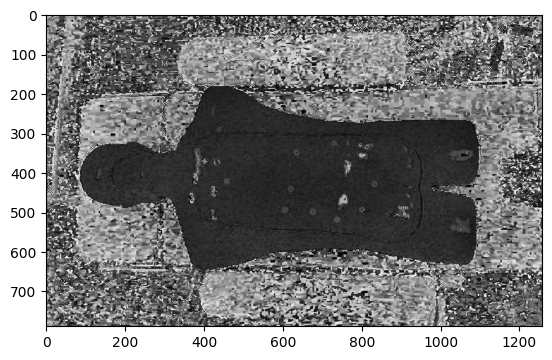

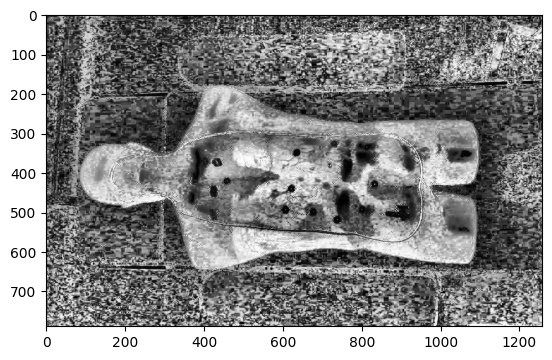

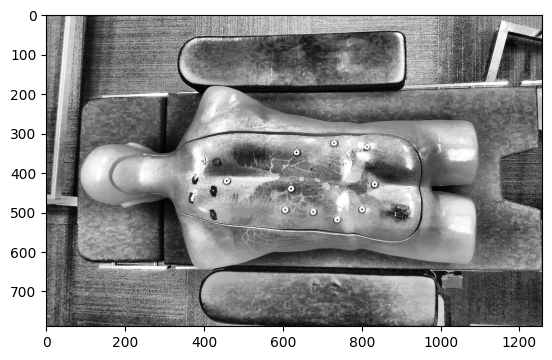

In [17]:
plt.imshow(h_clahe, cmap = "gray")
plt.show()
plt.imshow(s_clahe, cmap = "gray")
plt.show()
plt.imshow(v_clahe, cmap = "gray")
plt.show()

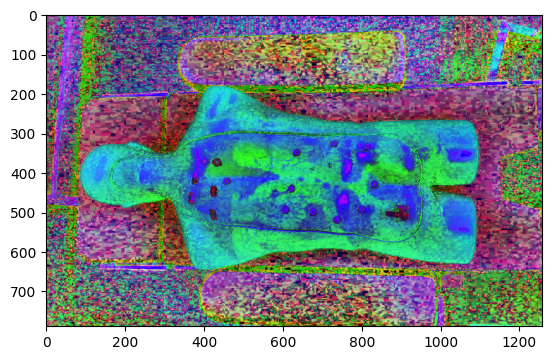

In [18]:
plt.imshow(hsv_clahe, cmap = "gray")
plt.show()

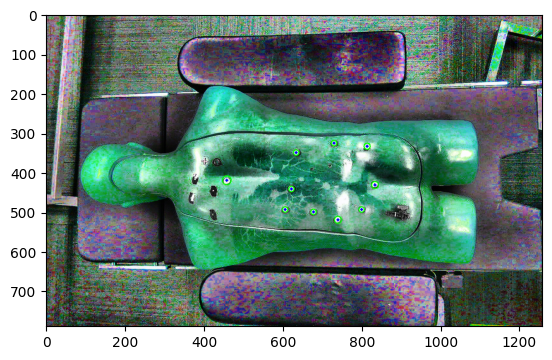

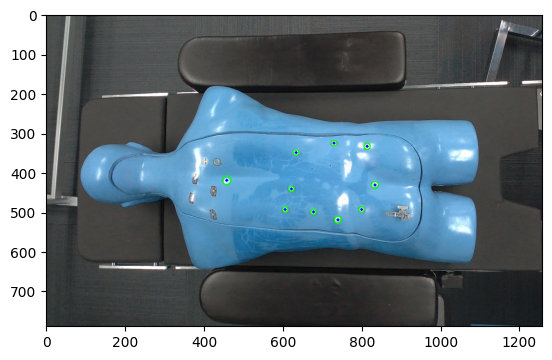

In [19]:
plt.imshow(img_clahe, cmap = "gray")
plt.show()
plt.imshow(img, cmap = "gray")
plt.show()

In [ ]:
# Display the image with the detected circles
cv2.imshow("Detected Circles", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-04-19 23:32:05.204 Python[70225:13082123] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
